<a href="https://colab.research.google.com/github/zmostafa/TensorFlow-Projects/blob/master/3_NeuralNetworks/cifar10_with_AlexNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Commented out IPython magic to ensure Python compatibility.
# Load pickled data
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textwrap import wrap
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
%tensorflow_version 1.x
import tensorflow as tf
from tensorflow.contrib.layers import flatten
tf.set_random_seed(42)

from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# y_train.shape is 2d, (50000, 1). While Keras is smart enough to handle this
# it's a good idea to flatten the array.
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

TensorFlow 1.x selected.


Using TensorFlow backend.


170500096/170498071 [==============================] - 6s 0us/step


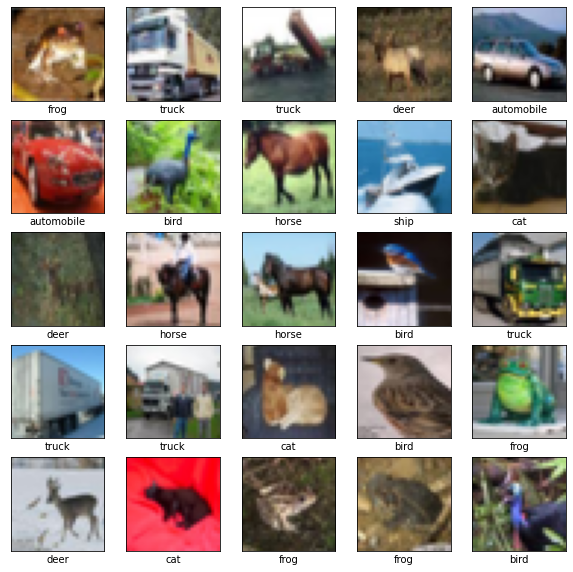

In [2]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[y_train[i]])
plt.show()


Number of training examples = 35000
Number of validation examples = 15000
Number of testing examples = 35000
Image data shape = (35000, 32, 32, 3)
Number of classes = 10


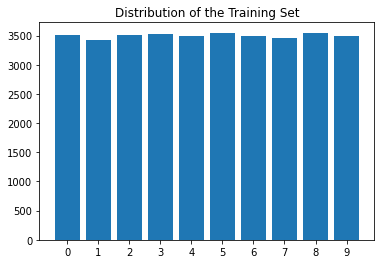

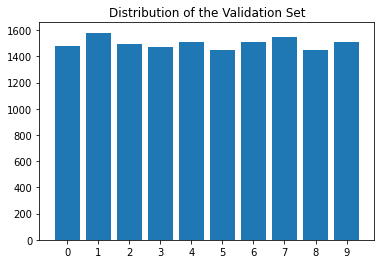

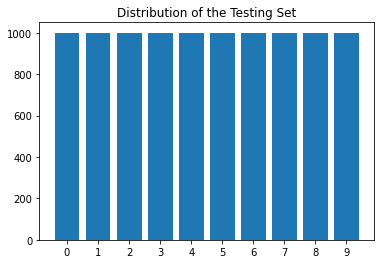

In [3]:
# Create Validation set
X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train,test_size=0.3)

# Number of train examples 
n_train = len(X_train)

# Number of validation examples
n_validation = len(X_valid)

#  Number of testing examples.
n_test = len(X_train)

#  What's the shape of an traffic sign image?
image_shape = X_train.shape

#  How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

images_by_id_train = [[ind for ind, id in enumerate(y_train) if id == i] for i in range(n_classes)]
images_by_id_valid = [[ind for ind, id in enumerate(y_valid) if id == i] for i in range(n_classes)]
images_by_id_test = [[ind for ind, id in enumerate(y_test) if id == i] for i in range(n_classes)]

plt.bar(range(n_classes), [len(s) for s in images_by_id_train], align='center')
plt.xticks(range(0, n_classes, 1))
plt.title('Distribution of the Training Set')
plt.show()

plt.bar(range(n_classes), [len(s) for s in images_by_id_valid], align='center')
plt.xticks(range(0, n_classes, 1))
plt.title('Distribution of the Validation Set')
plt.show()

plt.bar(range(n_classes), [len(s) for s in images_by_id_test], align='center')
plt.xticks(range(0, n_classes, 1))
plt.title('Distribution of the Testing Set')
plt.show()

In [4]:
# Normalize pixel values to be between 0 and 1

def normalize(img):
  return (img - 0.) / 255.

X_train = np.array([normalize(img) for img in X_train])
X_valid = np.array([normalize(img) for img in X_valid])
X_test = np.array([normalize(img) for img in X_test])

# Model Architecture

EPOCHS = 50
BATCH_SIZE = 128

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    weights = {
    # 28x28 conv, 3 input, 6 outputs
    'wconv1': tf.Variable(tf.truncated_normal([5,5,3,6], mean = mu , stddev = sigma)),
    # 10x10 conv, 6 inputs, 16 outputs
    'wconv2': tf.Variable(tf.truncated_normal([5, 5, 6, 16], mean = mu , stddev = sigma)),
    # fully connected, 400 inputs, 120 outputs
    'wfc1': tf.Variable(tf.truncated_normal([400,120], mean = mu , stddev = sigma)),
    # 120 inputs, 84 outputs (class prediction)
    'wfc2': tf.Variable(tf.truncated_normal([120, 84], mean = mu , stddev = sigma)),
    # 84 inputs, 10 outputs (class prediction)
    'wlogits': tf.Variable(tf.truncated_normal([84, 10], mean = mu , stddev = sigma))
    }

    biases = {
        'bconv1': tf.Variable(tf.zeros([6])),
        'bconv2': tf.Variable(tf.zeros([16])),
        'bfc1': tf.Variable(tf.zeros([120])),
        'bfc2': tf.Variable(tf.zeros([84])),
        'blogits': tf.Variable(tf.zeros([10]))
    }
    print("Start LeNet .... ")
    #  Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1 = tf.nn.conv2d(x,weights['wconv1'] ,[1,1,1,1] , padding='VALID')
    conv1 = tf.nn.bias_add(conv1, biases['bconv1'])    
    #  Activation.
    conv1 = tf.nn.relu(conv1)
    #  Pooling. Input = 28x28x6. Output = 14x14x6.
    # conv1 = tf.nn.max_pool(conv1,[1,3,3,1] ,[1,2,2,1] , padding='SAME')
    conv1 = tf.nn.max_pool(conv1,[1,2,2,1] ,[1,2,2,1] , padding='VALID')
    #  Layer 2: Convolutional. Output = 10x10x16.
    conv2 = tf.nn.conv2d(conv1,weights['wconv2'] ,[1,1,1,1], padding='VALID')
    conv2 = tf.nn.bias_add(conv2,biases['bconv2'])
    #  Activation.
    conv2 = tf.nn.relu(conv2)
    #  Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2,[1,2,2,1] ,[1,2,2,1] , padding='VALID')
    #  Flatten. Input = 5x5x16. Output = 400.
    conv2 = tf.contrib.layers.flatten(conv2)
    #  Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1 = tf.add(tf.matmul(conv2 , weights['wfc1'] ), biases['bfc1'])
    #  Activation.
    # softmax() gave low accuracy ??!!
    fc1 = tf.nn.relu(fc1)
    #  Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2 = tf.add(tf.matmul(fc1, weights['wfc2'] ), biases['bfc2'])
    #  Activation.
    fc2 = tf.nn.relu(fc2)
    # Apply Dropout
    # fc2 = tf.nn.dropout(fc2, dropout)
    #  Layer 5: Fully Connected. Input = 84. Output = 10.
    logits = tf.add(tf.matmul(fc2, weights['wlogits'] ), biases['blogits'])
    
    return logits


# Train Model

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 10)

rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

prediction = tf.argmax(logits, 1)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training on %d samples..." %num_examples)
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        # print("Validation Loss = {:.3f}".format(loss_operation))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './trafficSigns-Classifier')
    print("Model saved")

Start LeNet .... 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Training on 35000 samples...

EPOCH 1 ...
Validation Accuracy = 0.392

EPOCH 2 ...
Validation Accuracy = 0.456

EPOCH 3 ...
Validation Accuracy = 0.482

EPOCH 4 ...
Validation Accuracy = 0.507

EPOCH 5 ...
Validation Accuracy = 0.503

EPOCH 6 ...
Validation Accuracy = 0.528

EPOCH 7 ...
Validat

In [5]:
# Checking Model Accuracy

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    print("Training Accuracy = {:.3f}".format(evaluate(X_train, y_train)))
    print("Validation Accuracy = {:.3f}".format(evaluate(X_valid, y_valid)))
    print("Test Accuracy = {:.3f}".format(evaluate(X_test, y_test)))

INFO:tensorflow:Restoring parameters from ./trafficSigns-Classifier
Training Accuracy = 0.859
Validation Accuracy = 0.568
Test Accuracy = 0.568


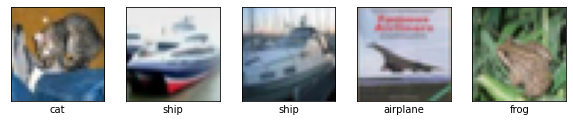

INFO:tensorflow:Restoring parameters from ./trafficSigns-Classifier
[3 8 1 2 4]


In [12]:
# plot the images
# plt.figure(1, figsize=(48,48))
# for i in range(5):
#     plt.subplot(1, 5, i+1)
#     plt.title("\n".join(wrap('{0} = {1}'.format(y_test[i], signs_ids_mapping[y_test[i]]), 20)), fontsize=40)
#     plt.imshow(X_test[i, :, :, :])
#     plt.axis('off')

plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[y_test[i]])
plt.show()
    
test_new = X_test[0:5]
y_new = y_test[0:5]

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    predictions = sess.run(prediction, feed_dict={x: test_new})
    print(predictions)

In [13]:
# Checking Model Accuracy

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(test_new, y_new)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./trafficSigns-Classifier
Test Accuracy = 0.400
